# Transposition, a bio-inspired operator

In [1]:
from evol_algorithm import *
import numpy as np
import matplotlib.pyplot as plt

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Crossover

**Rastrigin Function**

In [3]:
# crossover rastrigin
numb_generations = 20
size_pop = 50
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02 

dimensions = 5
max_domain = 5.12
precision = 4

# we define here all the function problem dependent so we don't need to modify the evolutionary algorithm
size_cromo = cromo_len(max_domain, precision)
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)

best_sea = sea(numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)
print(best_sea[1])
print(phenotype(best_sea[0], dimensions, precision))

2.9629288538141267
[1.0755, -0.0118, -0.0078, -0.0573, 0.0095]


**Scwefel Function**

In [5]:
# crossover schwefel
numb_generations = 20
size_pop = 500
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.03

dimensions = 3
max_domain = 500
precision = 4

# we define here all the function problem dependent so we don't need to modify the evolutionary algorithm
size_cromo = cromo_len(max_domain, precision)
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)
best_schwefel = sea(numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_schwefel(dimensions, precision), pop)
print(best_schwefel[1])
print(phenotype(best_schwefel[0], dimensions, precision))
print(best_schwefel)

6.483124313114331
[420.5144, 420.8332, 418.9828]
([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], 6.483124313114331)


In [5]:
#rastring with CROSSOVER for plot

numb_generations = 20
size_pop = 50
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02 

dimensions = 3
max_domain = 5.12
precision = 4

size_cromo = cromo_len(max_domain, precision)
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)

# plot di rastring con crossover
best_sea_for_plot = sea_for_plot(numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)

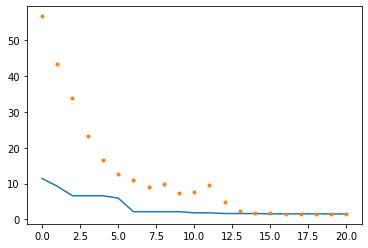

In [6]:
plt.plot(best_sea_for_plot[1])
plt.plot(best_sea_for_plot[2],'.')

In [7]:
#rastring with TRANSPOSITION for plot

numb_generations = 20
size_pop = 50
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02 

dimensions = 6
max_domain = 5.12
precision = 4

size_cromo = cromo_len(max_domain, precision)
recombination = transposition(3)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)

# plot di rastring con transposition
best_sea_for_plot = sea_for_plot(numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)

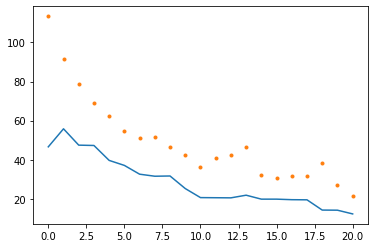

In [8]:
plt.plot(best_sea_for_plot[1])
plt.plot(best_sea_for_plot[2],'.')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Run for file
We run the code to store the results in a file for future statistics

**CROSSOVER - RASTRIGIN**

In [6]:
sea_boa_file('test',3,numb_generations, size_pop, size_cromo, prob_mut, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)

([1713.6038203833941,
  545.4001641559996,
  293.0815880110456,
  259.0134773421126,
  99.75841883268063,
  52.95282120047809,
  40.10946726107363,
  2.9419068520488416,
  2.9419068520488416,
  2.9419068520488416,
  2.9419068520488416,
  2.588142384065751,
  2.1968929727684454,
  0.533982627229868,
  0.533982627229868,
  0.22041196966599585,
  0.22041196966599585,
  0.19814742921381878,
  0.09127937903701167,
  0.0383513908723927,
  0.01540413336603308],
 [2765.0152041891597,
  2029.572950078403,
  449.165078775528,
  353.7028498375657,
  140.2187612838505,
  69.58808532453202,
  51.140399281202214,
  26.862159731322873,
  13.665583292554778,
  7.1607408678674185,
  6.850522101759491,
  5.413979015403452,
  3.990630152843117,
  2.6038030240879415,
  2.3704878161787413,
  1.0517217107751347,
  0.9516553703105698,
  0.6607778135696805,
  0.6248108128790454,
  0.502222274798072,
  0.3924514441605342])